## Sim Demo

### Imports

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from env.imports import *

In [23]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

#### Check job specs

In [24]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 19.4%
RAM Usage: 14.1%
Available RAM: 323.9G
Total RAM: 377.1G
52.4G


In [25]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


None
Available GPUs: 0


#### Data viz <a id="sims"></a>

In [26]:
from data.data_load import load_transcriptome, load_connectome
from data.data_viz import plot_connectome, plot_transcriptome

X = load_transcriptome(parcellation='S400', hemisphere='both', omit_subcortical=False, sort_genes='expression', impute_strategy='mirror_interpolate')
Y = load_connectome(parcellation='S400', hemisphere='both', omit_subcortical=False)


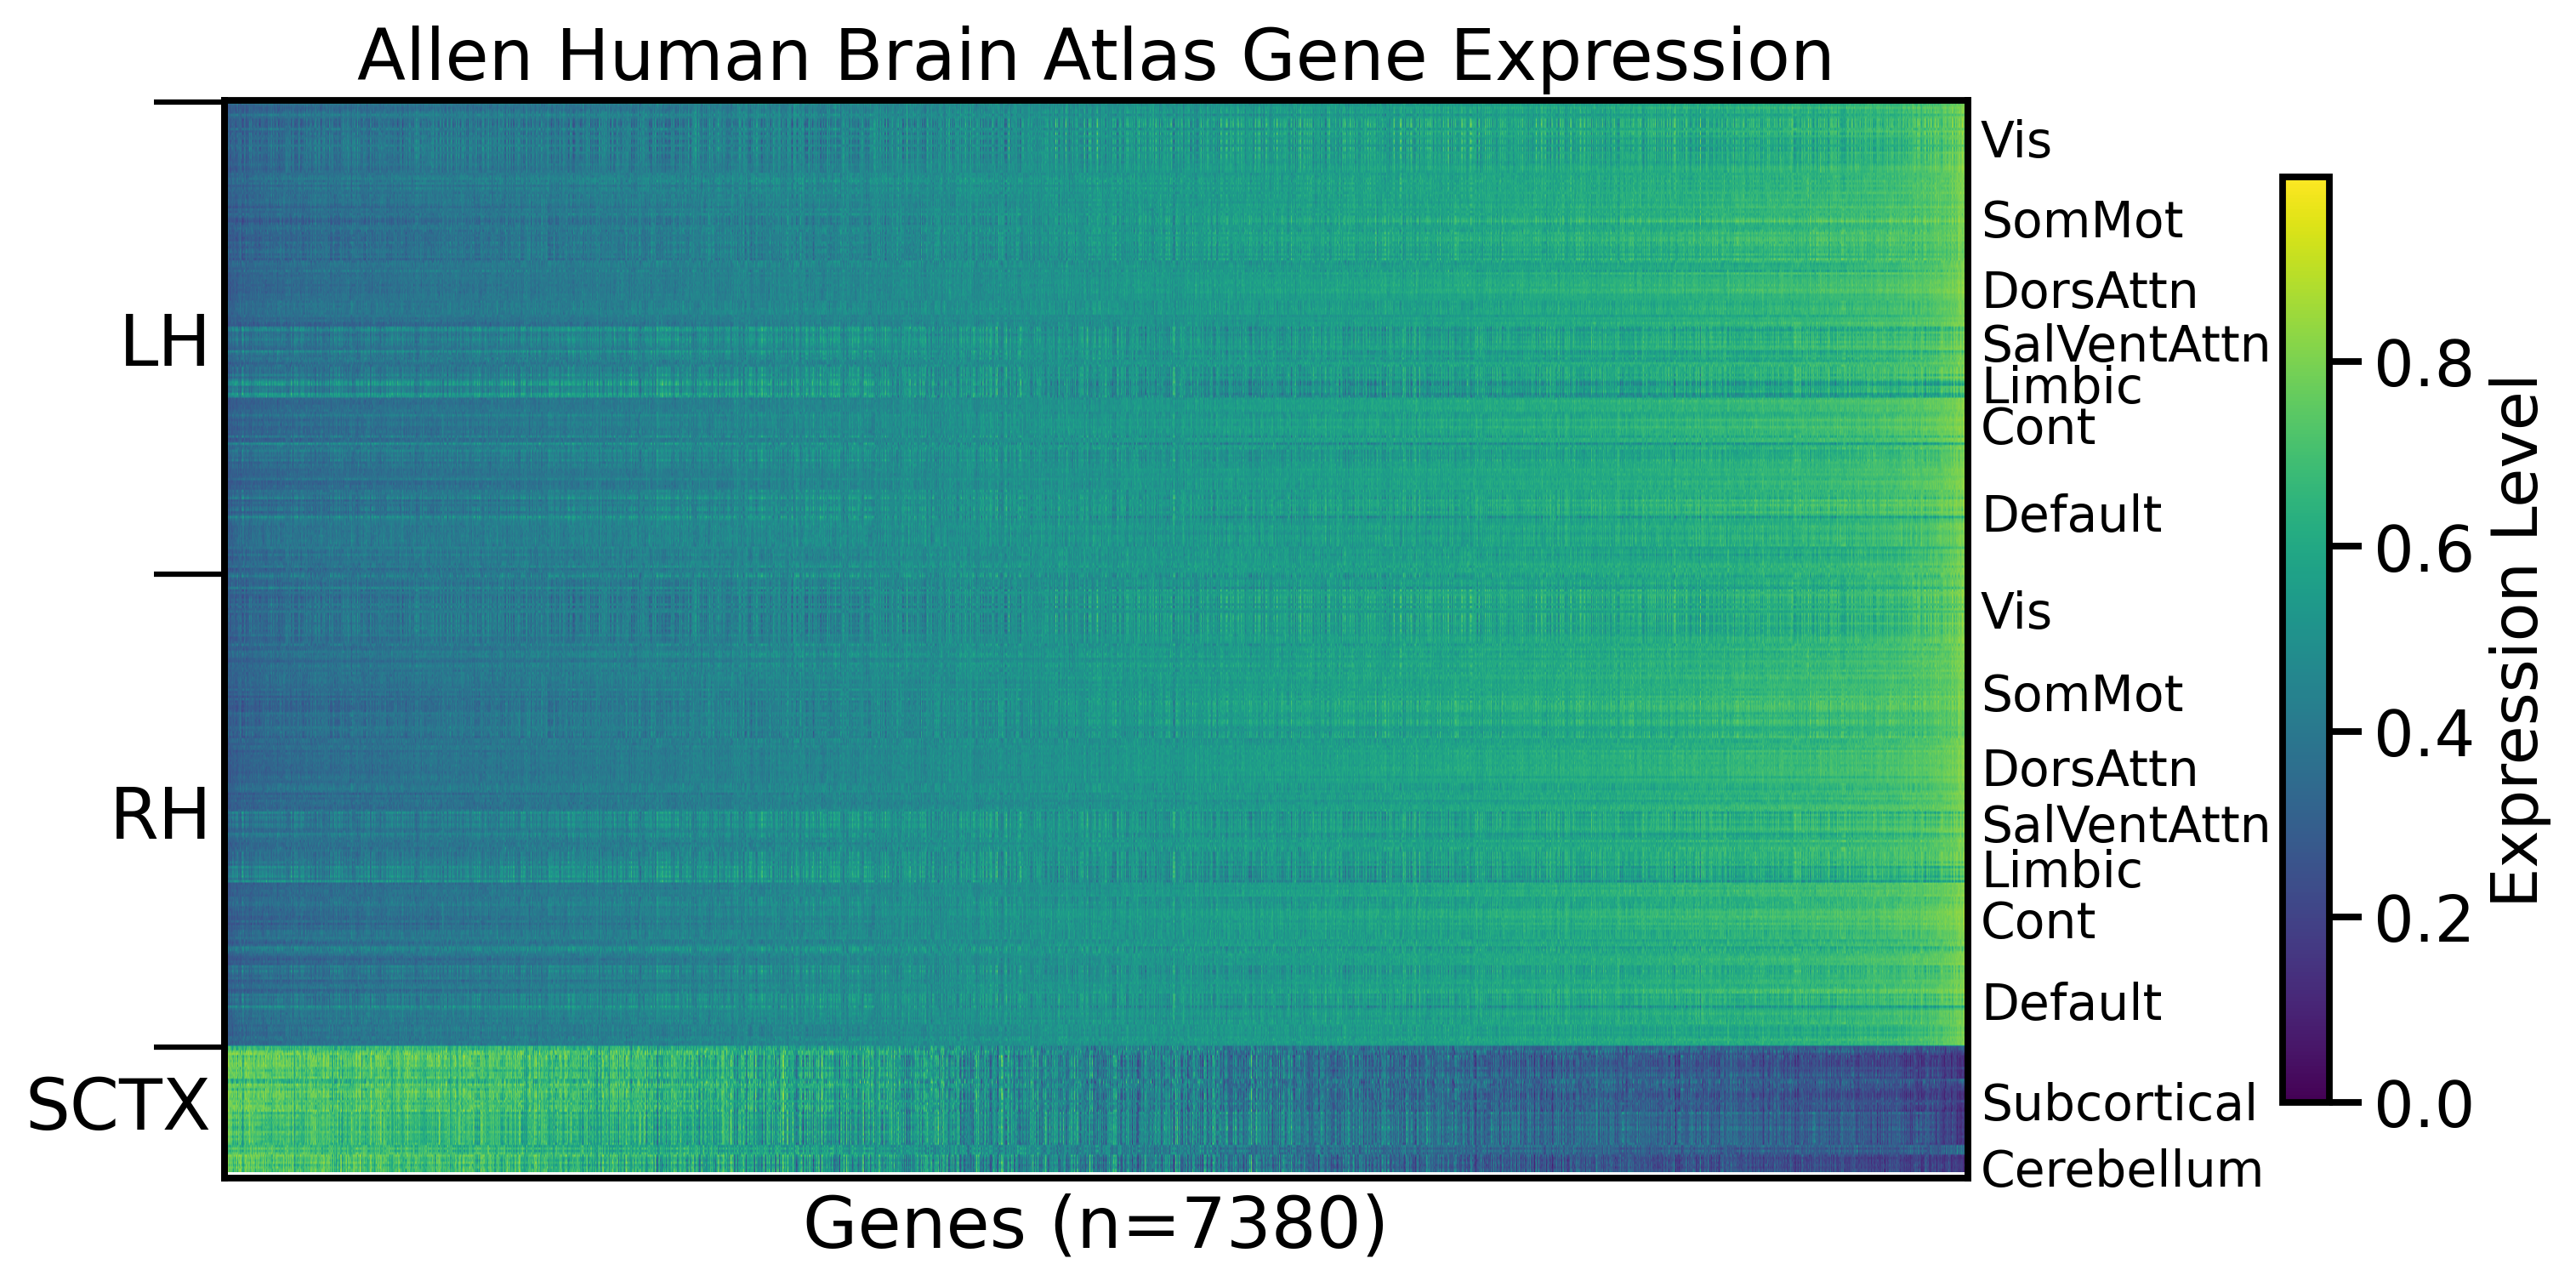

In [27]:
plot_transcriptome(null_model='none', parcellation='S400', hemisphere='both', omit_subcortical=False, gene_list='0.2', sort_genes='expression', impute_strategy='mirror_interpolate') #, add_hemisphere_labels=True, add_network_labels=False)

spinning gene expression
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1277653/1880596349.py", line 1, in <module>
    plot_transcriptome(null_model='spin', parcellation='S400', hemisphere='both', omit_subcortical=False, gene_list='0.2', sort_genes='expression', impute_strategy='mirror_interpolate') #, add_hemisphere_labels=True, add_network_labels=False)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_viz.py", line 148, in plot_transcriptome
    X = load_transcriptome(
        ^^^^^^^^^^^^^^^^^^^
  File "/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_load.py", line 187, in load_transcriptome
    msr.fit(W)
  File "/ext3/miniconda

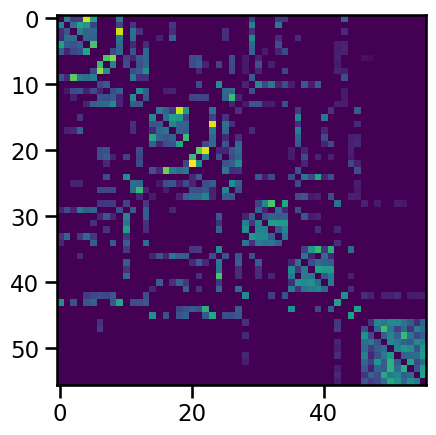

In [41]:
plot_transcriptome(null_model='spin', parcellation='S400', hemisphere='both', omit_subcortical=False, gene_list='0.2', sort_genes='expression', impute_strategy='mirror_interpolate') #, add_hemisphere_labels=True, add_network_labels=False)

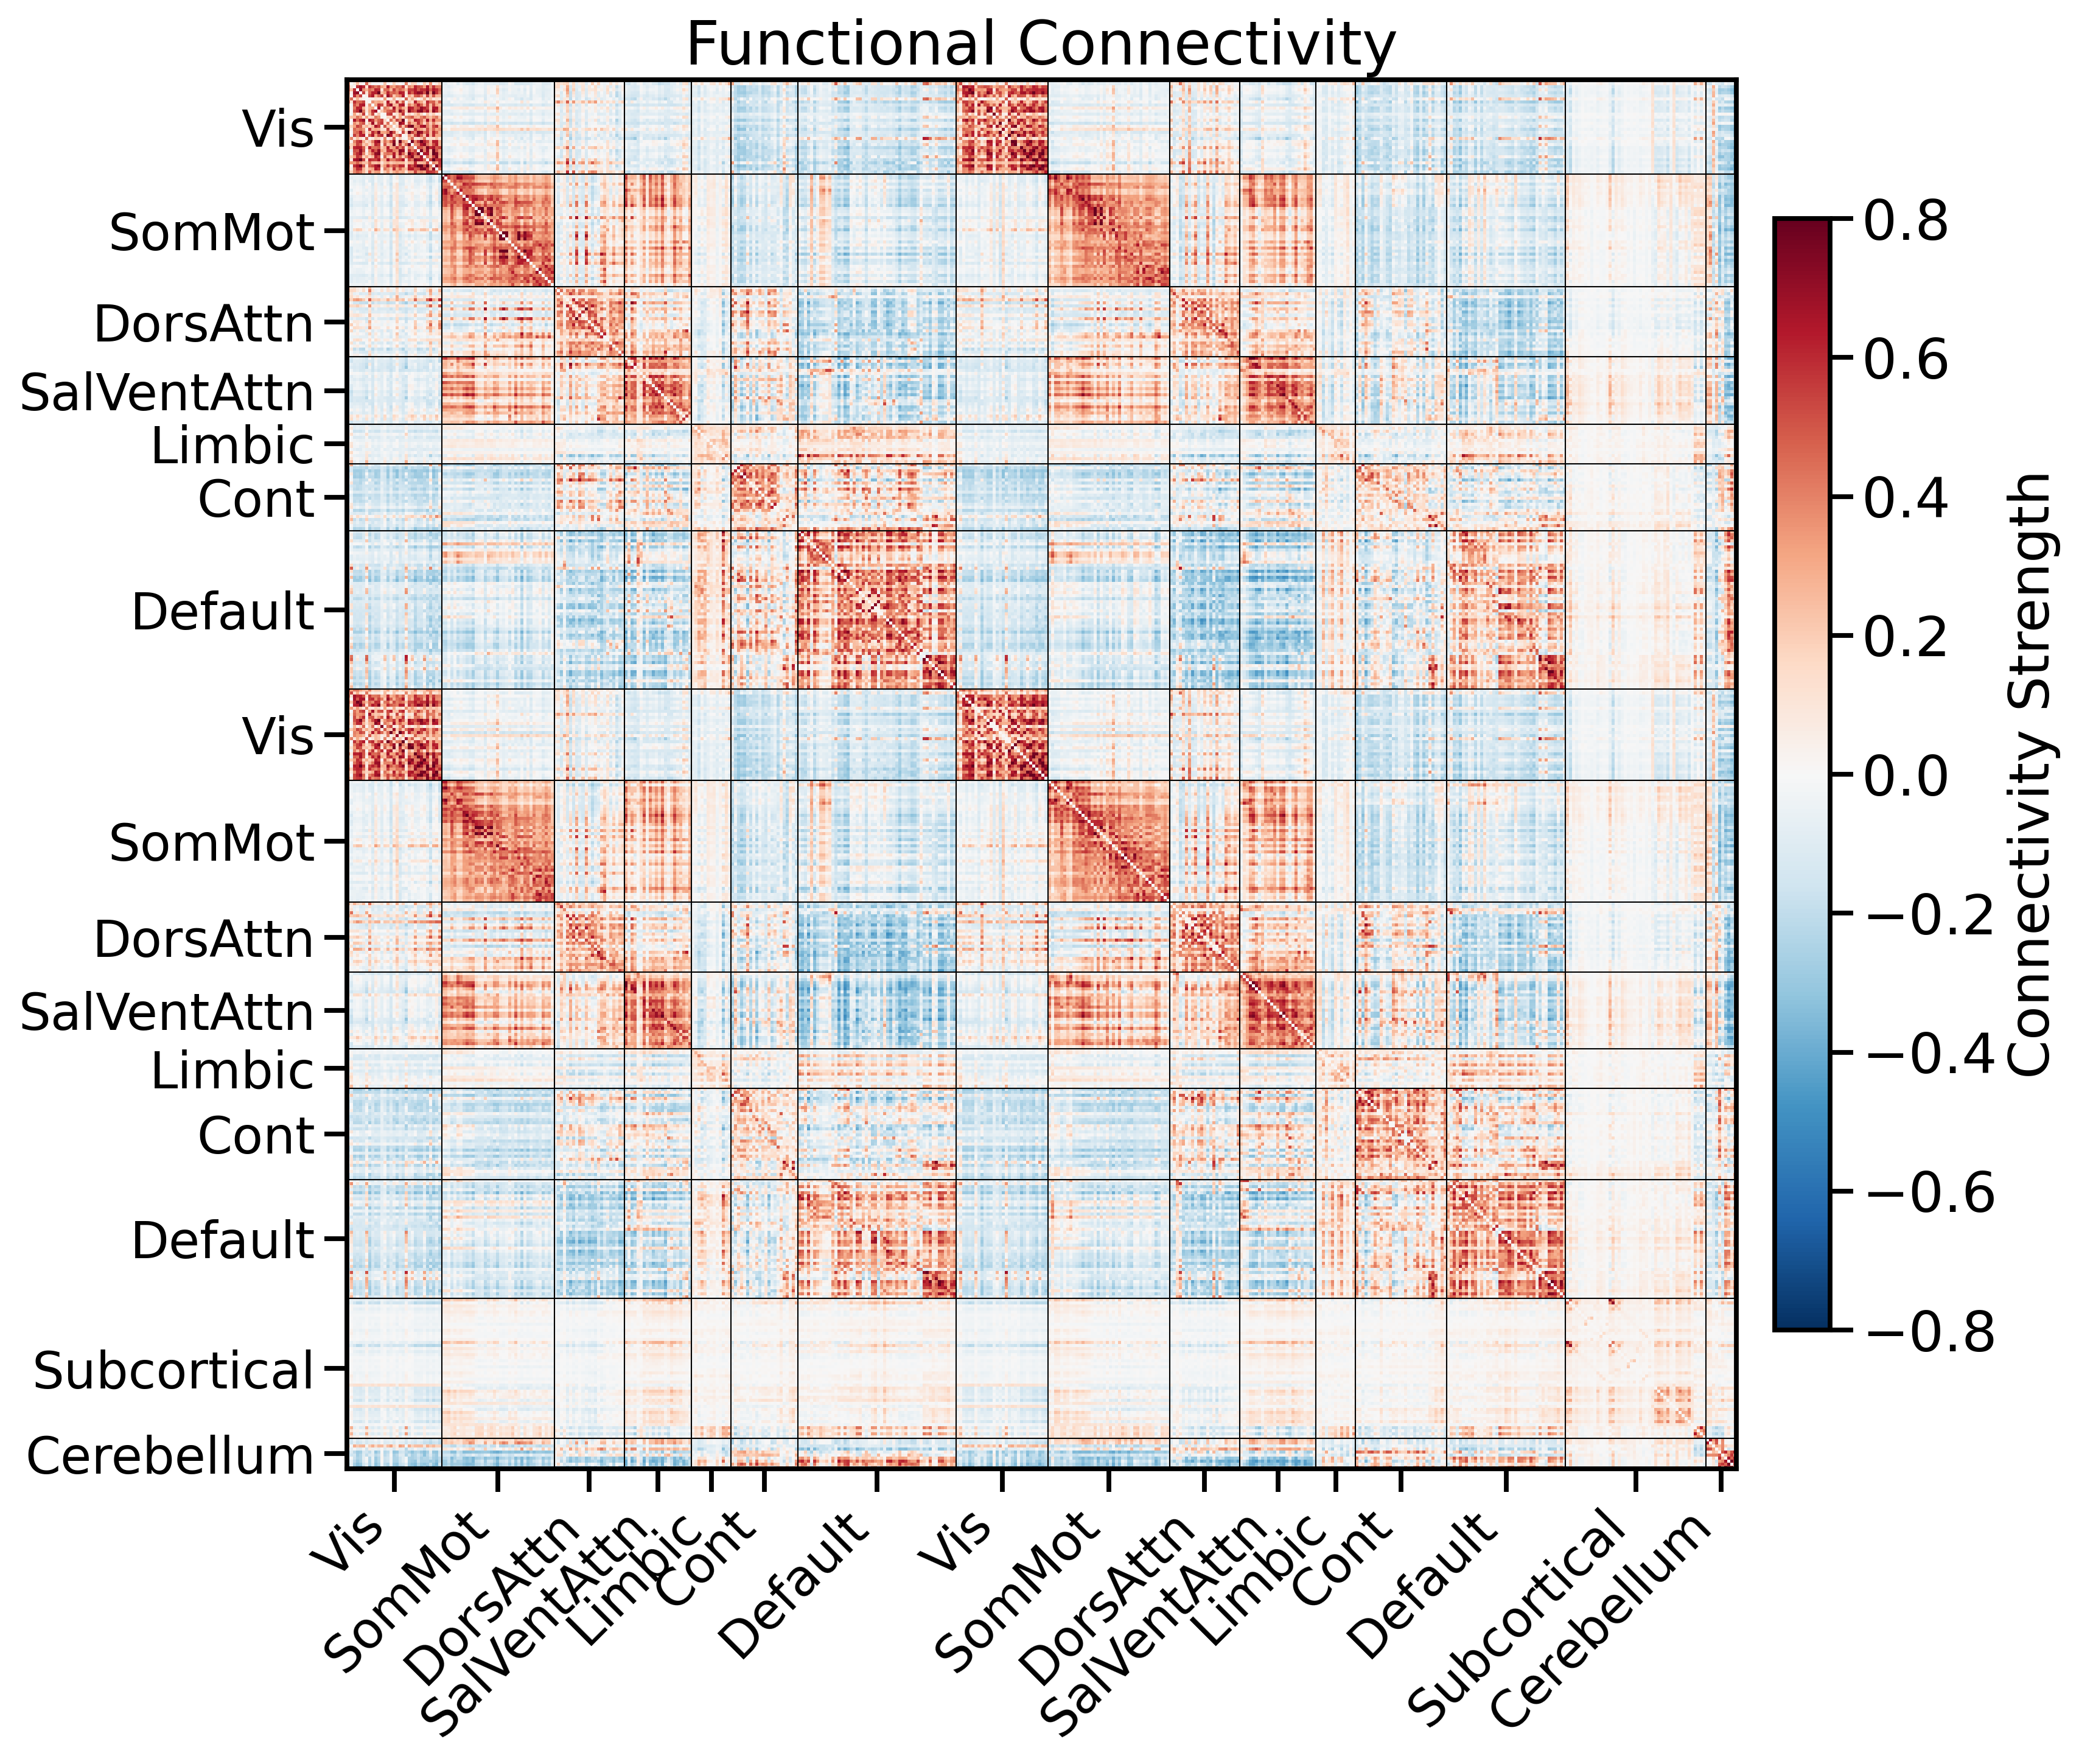

In [113]:
plot_connectome(parcellation='S400', hemisphere='both', measure='FC', omit_subcortical=False, add_network_labels=True)